# 2.3 PageRank
## 2.3(a)

In [7]:
library('igraph')
library('Matrix')
library('pracma')

In [8]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [9]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

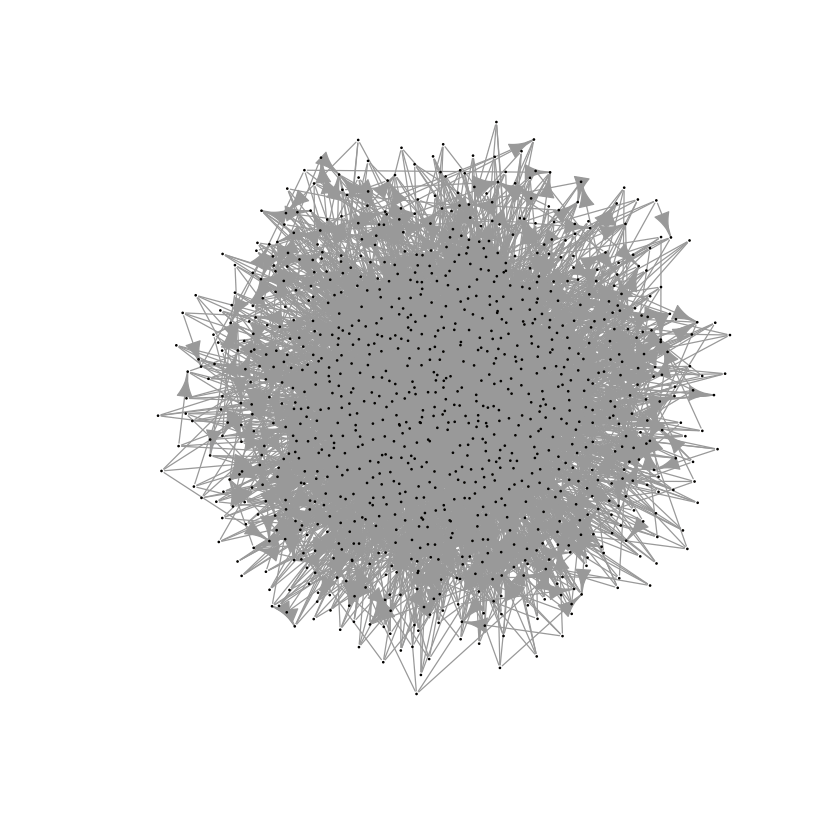

In [10]:
n <- 1000
g <- barabasi.game(n, m=4, directed=T)
plot(g,vertex.size=0.5, vertex.label.cex=0.001)
dia <- diameter(g)
deg <- degree(g,mode=c("in"))

In [12]:
#print (deg)

In [13]:
transition_matrix <- create_transition_matrix(g)
#print(transition_matrix)

In [14]:
p_init <- rep(1/n, n)
visits <- rep(0, n)
#visits[1] <- visits[1]+1
#print (visits)
#print (p_init)

In [15]:
for (i in 1:10000){
    v_init = sample(1:vcount(g), 1, prob = p_init)    
    v_last = random_walk(g, dia*10, v_init, transition_matrix)
    #fprintf('%d\n', v_last)
    visits[v_last] <- visits[v_last]+1
}
#print (v)

In [16]:
visit_prob_a = visits/10000
print (visit_prob_a)

   [1] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0

[1] 0.506634


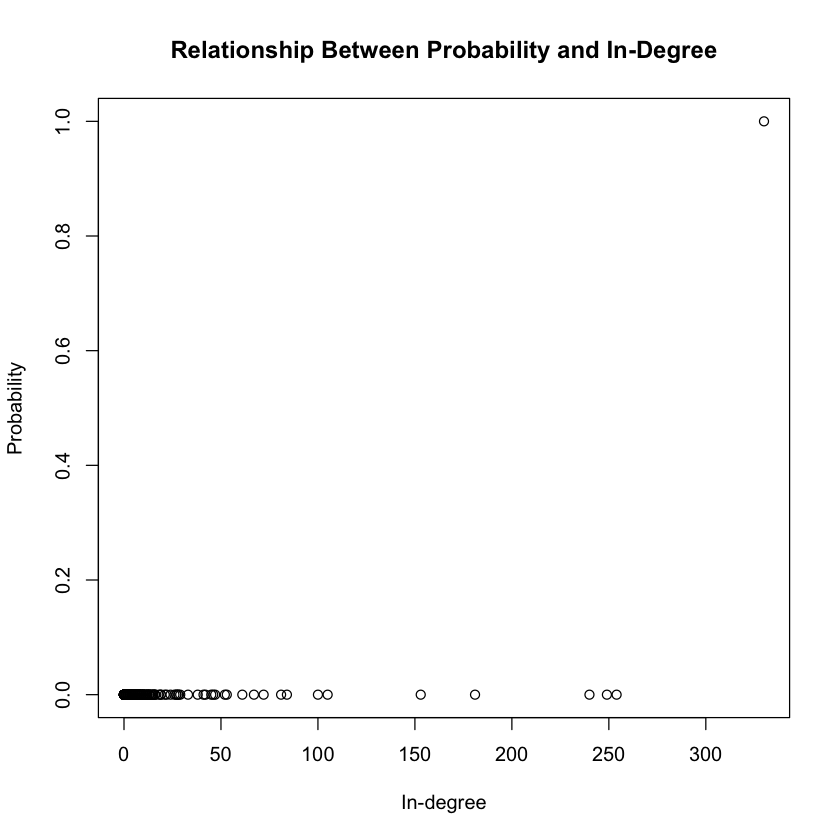

In [17]:
plot(deg,visit_prob_a,main="Relationship Between Probability and In-Degree",xlab="In-degree",ylab="Probability",type="p")
cor=cor(deg,visit_prob_a) # count the probability correlation
print(cor)

### The first node has the probability of 100%, and the other nodes have the probability of 0%.

## 2.3(b)

In [18]:
random_walk_with_teleportation = function (g, num_steps, start_node, transition_matrix = NULL, tele_prob){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        teleport = sample(0:1, 1, prob = c(1-tele_prob, tele_prob))
        if (teleport == 0){
            PMF = transition_matrix[v, ]
            }
        else {
            PMF = p_init
        }
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [19]:
visits <- rep(0, n)
for (i in 1:10000){
    v_init = sample(1:vcount(g), 1, prob = p_init)    
    v_last = random_walk_with_teleportation(g, dia*10, v_init, transition_matrix, 0.15)
    #fprintf('%d\n', v_last)
    visits[v_last] <- visits[v_last]+1
}

In [14]:
#print(sum(visits))
#print(visits)

In [20]:
visit_prob_b = visits/10000
print (visit_prob_b)

   [1] 0.6029 0.0485 0.0346 0.0170 0.0094 0.0130 0.0089 0.0077 0.0038 0.0003
  [11] 0.0019 0.0007 0.0024 0.0066 0.0012 0.0032 0.0004 0.0004 0.0008 0.0024
  [21] 0.0037 0.0060 0.0002 0.0002 0.0003 0.0029 0.0003 0.0016 0.0029 0.0004
  [31] 0.0004 0.0008 0.0010 0.0004 0.0031 0.0025 0.0026 0.0002 0.0025 0.0009
  [41] 0.0012 0.0006 0.0001 0.0004 0.0003 0.0011 0.0006 0.0011 0.0025 0.0003
  [51] 0.0018 0.0008 0.0003 0.0002 0.0007 0.0001 0.0008 0.0020 0.0007 0.0009
  [61] 0.0007 0.0014 0.0002 0.0002 0.0009 0.0002 0.0008 0.0006 0.0004 0.0002
  [71] 0.0002 0.0009 0.0007 0.0002 0.0003 0.0000 0.0004 0.0004 0.0004 0.0005
  [81] 0.0002 0.0003 0.0003 0.0001 0.0012 0.0001 0.0009 0.0001 0.0007 0.0003
  [91] 0.0000 0.0002 0.0002 0.0009 0.0001 0.0005 0.0003 0.0000 0.0004 0.0004
 [101] 0.0004 0.0003 0.0001 0.0001 0.0008 0.0002 0.0004 0.0000 0.0003 0.0010
 [111] 0.0001 0.0001 0.0001 0.0008 0.0002 0.0001 0.0001 0.0001 0.0005 0.0007
 [121] 0.0003 0.0008 0.0000 0.0003 0.0001 0.0001 0.0005 0.0001 0.0005 0.0005

[1] 0.5865174


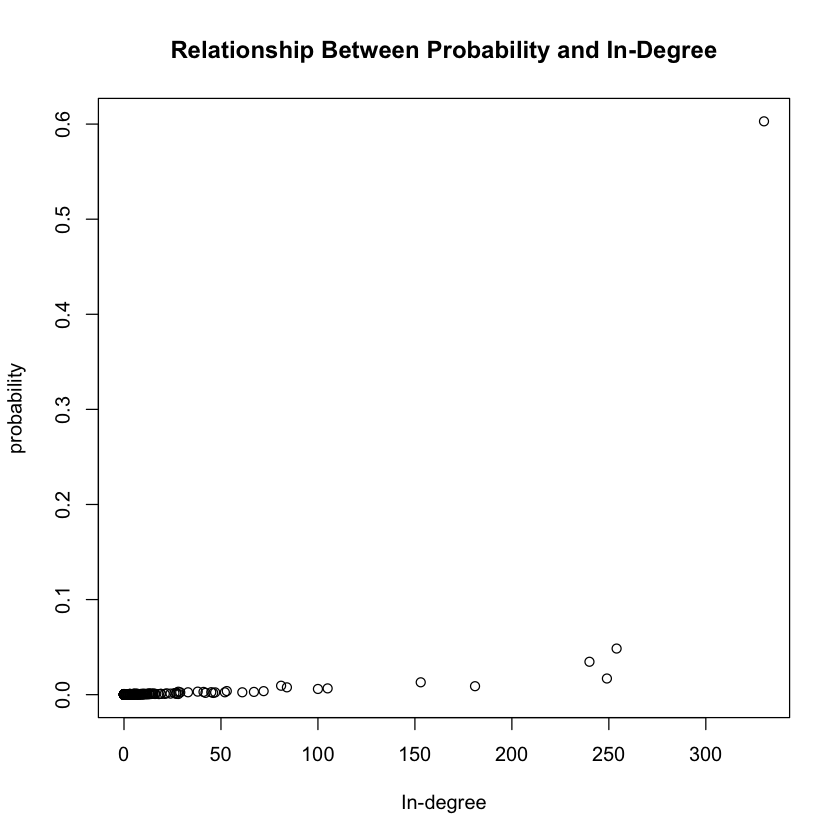

In [21]:
plot(deg,visit_prob_b,main="Relationship Between Probability and In-Degree",xlab="In-degree",ylab="probability",type="p")
cor=cor(deg,visit_prob_b) # count the probability correlation
print(cor)

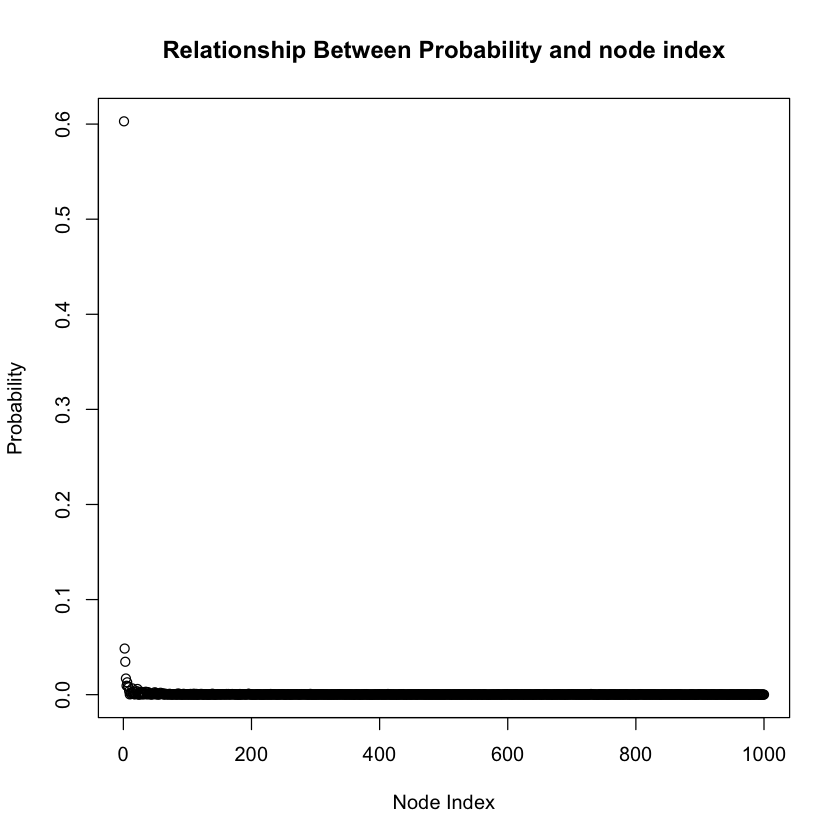

In [22]:
plot(seq(1:n),visit_prob_b,main="Relationship Between Probability and node index",xlab="Node Index",ylab="Probability",type="p")

# 2.4 Personalized PageRank
## 2.4(a)

In [23]:
pr <- visit_prob_a
#pr <- page_rank(g)$vector
#print (pr)

In [44]:
#print (transition_matrix)

In [24]:
tele = 0.15
transition_matrix <- transition_matrix*(1-tele) + pr*tele
#print (transition_matrix)

In [25]:
visits <- rep(0, n)
for (i in 1:10000){
    v_init = sample(1:vcount(g), 1, prob = p_init)    
    v_last = random_walk(g, dia*10, v_init, transition_matrix)
    #fprintf('%d\n', v_last)
    visits[v_last] <- visits[v_last]+1
}

In [26]:
visit_prob_4a = visits/10000
print (visit_prob_4a)

   [1] 0.2372 0.1109 0.0733 0.0386 0.0177 0.0308 0.0244 0.0164 0.0052 0.0002
  [11] 0.0041 0.0011 0.0053 0.0140 0.0023 0.0060 0.0015 0.0012 0.0014 0.0044
  [21] 0.0073 0.0109 0.0001 0.0013 0.0015 0.0049 0.0007 0.0031 0.0072 0.0004
  [31] 0.0011 0.0024 0.0016 0.0007 0.0054 0.0058 0.0050 0.0002 0.0027 0.0012
  [41] 0.0010 0.0015 0.0006 0.0004 0.0008 0.0015 0.0004 0.0024 0.0051 0.0006
  [51] 0.0050 0.0002 0.0003 0.0002 0.0014 0.0004 0.0016 0.0035 0.0014 0.0020
  [61] 0.0010 0.0022 0.0002 0.0016 0.0017 0.0004 0.0009 0.0009 0.0003 0.0006
  [71] 0.0006 0.0009 0.0019 0.0008 0.0009 0.0005 0.0006 0.0001 0.0005 0.0011
  [81] 0.0003 0.0006 0.0004 0.0004 0.0011 0.0007 0.0011 0.0009 0.0016 0.0002
  [91] 0.0002 0.0007 0.0006 0.0009 0.0002 0.0010 0.0003 0.0003 0.0002 0.0008
 [101] 0.0004 0.0008 0.0002 0.0000 0.0008 0.0007 0.0016 0.0003 0.0005 0.0008
 [111] 0.0003 0.0006 0.0006 0.0013 0.0006 0.0001 0.0003 0.0004 0.0006 0.0005
 [121] 0.0005 0.0012 0.0003 0.0001 0.0003 0.0004 0.0008 0.0004 0.0009 0.0005

[1] 0.8322834


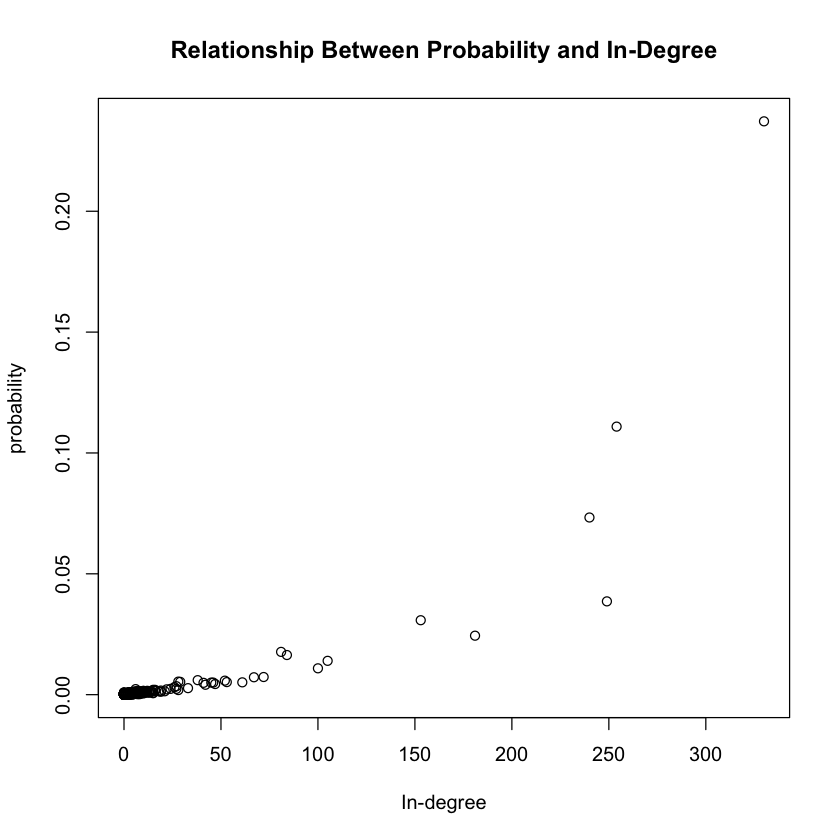

In [27]:
plot(deg,visit_prob_4a,main="Relationship Between Probability and In-Degree",xlab="In-degree",ylab="probability",type="p")
cor=cor(deg,visit_prob_4a) # count the probability correlation
print(cor)

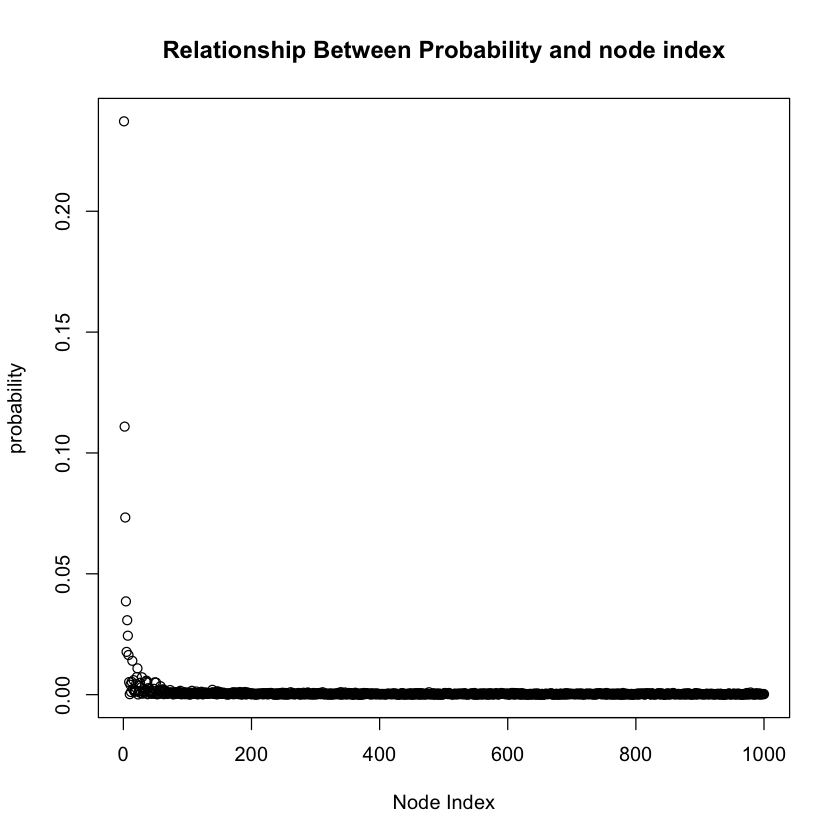

In [28]:
plot(seq(1:n),visit_prob_4a,main="Relationship Between Probability and node index",xlab="Node Index",ylab="probability",type="p")

## 2.4(b)

In [29]:
transition_matrix <- create_transition_matrix(g)

In [30]:
which.median = function(x) {
  if (length(x) %% 2 != 0) {
    which(x == median(x))
  } else if (length(x) %% 2 == 0) {
    a = sort(x)[c(length(x)/2, length(x)/2+1)]
    c(which(x == a[1]), which(x == a[2]))
  }
}

In [31]:
m <- which.median(pr)
two_nodes <- sample(m, 2) 
print (two_nodes)

[1] 600 394


In [32]:
random_walk_with_teleportation_two_nodes = function (g, num_steps, start_node, transition_matrix = NULL, tele_prob, x_nodes){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        teleport = sample(0:1, 1, prob = c(1-tele_prob, tele_prob))
        if (teleport == 0){
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)  
            }
        else {
            v = sample(x_nodes, 1, prob = c(0.5,0.5))  
        }       
    }
    
    return(v)
}

In [33]:
visits <- rep(0, n)
for (i in 1:10000){
    v_init = sample(1:vcount(g), 1, prob = p_init)    
    v_last = random_walk_with_teleportation_two_nodes(g, dia*10, v_init, transition_matrix, 0.15, two_nodes)
    #fprintf('%d\n', v_last)
    visits[v_last] <- visits[v_last]+1
}

In [34]:
visit_prob_4b = visits/10000
print (visit_prob_4b)

   [1] 0.6146 0.0382 0.0354 0.0250 0.0192 0.0087 0.0021 0.0064 0.0034 0.0000
  [11] 0.0000 0.0000 0.0000 0.0173 0.0001 0.0058 0.0000 0.0000 0.0000 0.0003
  [21] 0.0000 0.0005 0.0000 0.0000 0.0000 0.0026 0.0000 0.0000 0.0017 0.0000
  [31] 0.0000 0.0002 0.0000 0.0000 0.0030 0.0007 0.0000 0.0000 0.0009 0.0000
  [41] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0006 0.0000
  [51] 0.0038 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0037 0.0000 0.0000
  [61] 0.0000 0.0027 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  [71] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  [81] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0172 0.0000
  [91] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [101] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [111] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [121] 0.0000 0.0162 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000

[1] 0.5717535


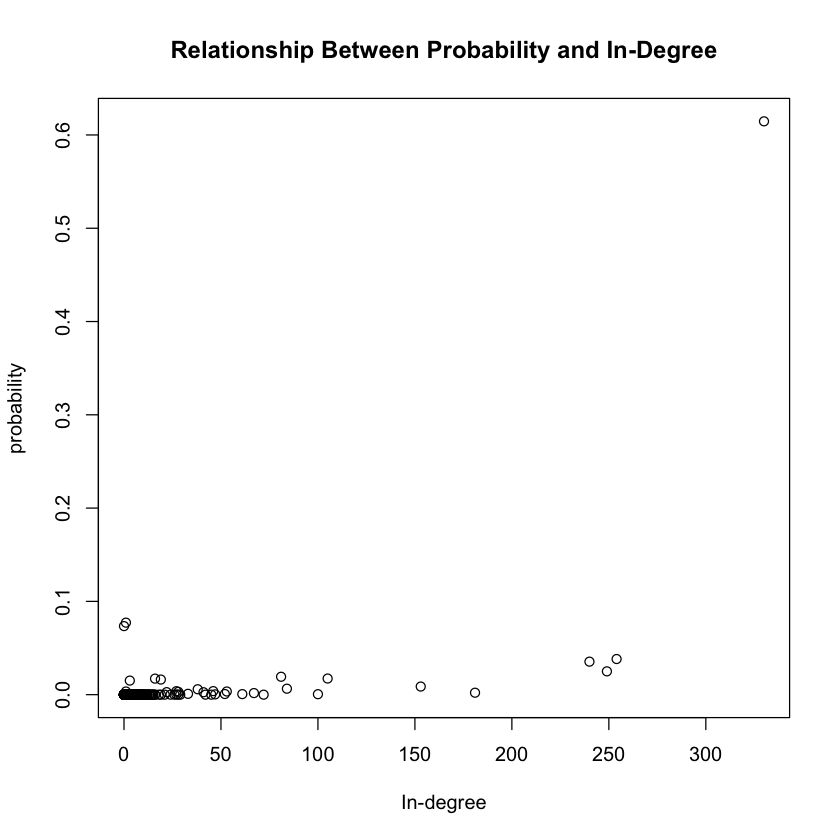

In [35]:
plot(deg,visit_prob_4b,main="Relationship Between Probability and In-Degree",xlab="In-degree",ylab="probability",type="p")
cor=cor(deg,visit_prob_4b) # count the probability correlation
print(cor)

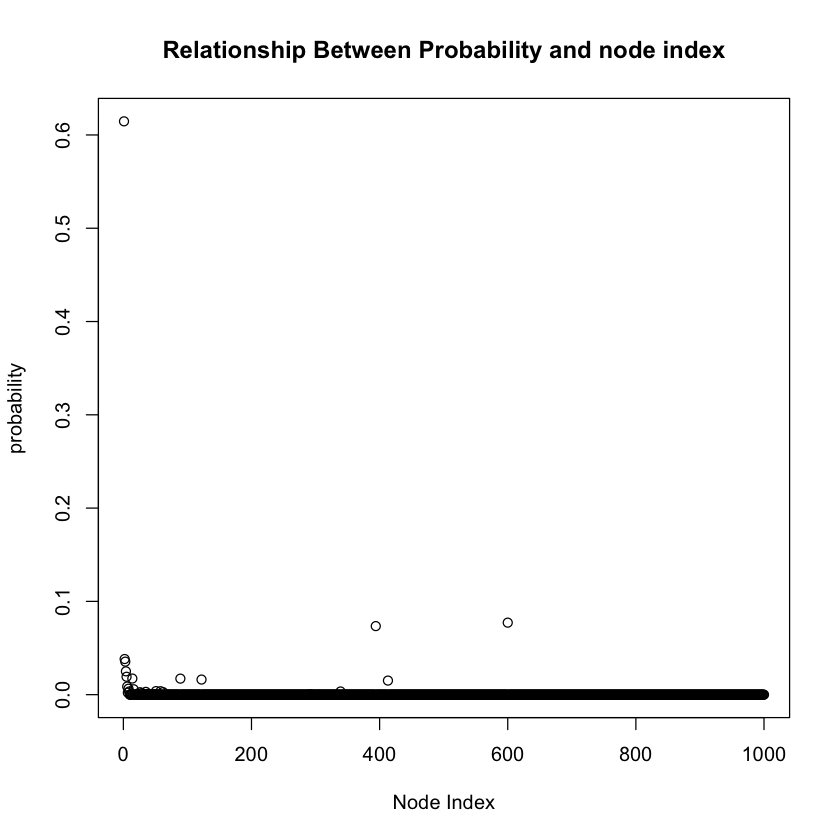

In [36]:
plot(seq(1:n),visit_prob_4b,main="Relationship Between Probability and node index",xlab="Node Index",ylab="probability",type="p")